## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





# 1. Dataset Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#your work here
df = pd.read_csv("./mosquitos_data.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Response   43 non-null     int64 
 1   Treatment  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [110]:
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


## 1.1 Boxplot number of mosquitos

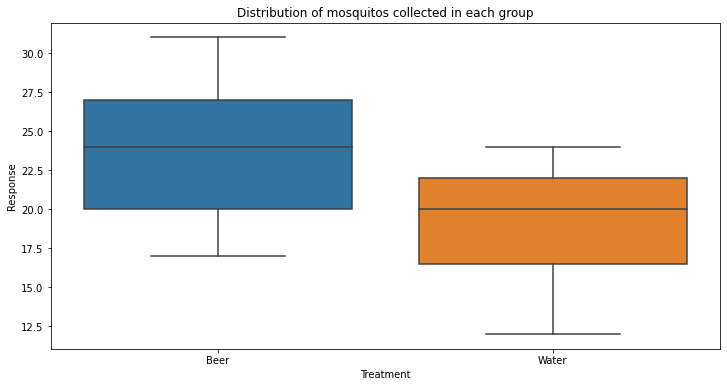

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="Treatment", y="Response", data=df, ax=ax)
ax.set_title("Distribution of mosquitos collected in each group")
plt.show()

## 1.2 What does the graph reveal about the data in both groups?

The graph shows how the distribution of people that drinks beer has higher values that people who drinks water. In average the persons that drink beer attract between 4 and 5 more mosquitos.

## 1.3 Basic Statistics

In [77]:
df.groupby('Treatment').describe()

Response                                                   
             count       mean       std   min   25%   50%   75%   max
Treatment                                                            
Beer          25.0  23.600000  4.133199  17.0  20.0  24.0  27.0  31.0
Water         18.0  19.222222  3.671120  12.0  16.5  20.0  22.0  24.0

The statistics confrim what we saw in the graph. People who drink beer attracts, in average, 4.4 more mosquitos. Also we can see that the variance is a little higher in people who drink beer, but it seems no to be significant.

# 2. Simulation

In [81]:
# Initialize mean vectors and parameters
n_sim = 10000
mean_beer=np.empty(n_sim)
mean_water=np.empty(n_sim)
mean_diff=np.empty(n_sim)
for i in range(n_sim):
    x = df.Response.copy()
    np.random.shuffle(x)
    m_beer = x[:25].mean()
    m_water = x[25:].mean()
    mean_beer[i] = m_beer
    mean_water[i] = m_water
    mean_diff[i] = m_beer-m_water

In [84]:
p = (mean_diff>=4.4).sum()/n_sim

In [87]:
print(f"The probability of obtaining the experiment outcome assuming no association between beer consumption is: {p}")

The probability of obtaining the experiment outcome assuming no association between beer consumption is: 0.0007


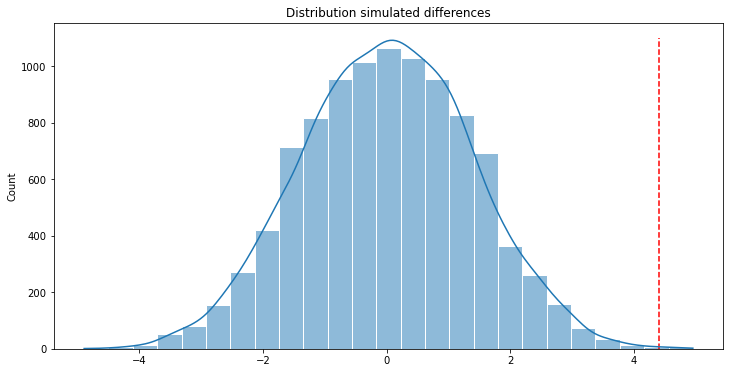

In [109]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=mean_diff, bins=25, kde=True, ax=ax, edgecolor='white')
ax.set_title("Distribution simulated differences")
ax.vlines(x=4.4, ymin=0, ymax=1100, color='red', ls="--")
plt.show()

The plot clearly show how improbably is that the difference is $4.4$ assuming the same distributions in both groups.